<a href="https://colab.research.google.com/github/DSjeongmin/Kaggle/blob/main/%5Bkaggle%5D%5Bhouse_prices%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Features
* SalePrice	집값
* ID	집을 구분하는 번호
* date	집을 구매한 날짜
* price	집의 가격
* OverallQual	전체 재료 및 마지막 품질
* GrLivArea	생활 면적 평방 피트
* GarageCars	차고
* 1stFlrSF	1층 평방 피트
* YearBuilt	최초 공사 일
* YearRemodAdd	리모델한 날
* Fireplaces	벽난로 수
* OpenPorchSF	평방 피트 단위의 현관 면적
* MasVnrArea	제곱 피트의 벽돌 베니어 면적
* LotFrontage	건물에 연결된 거리의 선형 피트
* CentralAir	중앙 에어컨
* KitchenQual	주방 품질
* HeatingQC	난방 품질 및 상태
* ExterQual	외부 재료 품질
* BsmtQual	지하실의 높이


In [ ]:
# kaggle.json upload
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jeongmin22","key":"977cb7cf72b827c224f2a621dbe93cbb"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 12.3MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 60.2MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 13.4MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 60.4MB/s]


In [ ]:
!pip install d2l

In [ ]:
!pip install mxnet

In [ ]:
!pip install mlxtend

In [ ]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

from subprocess import check_output

In [ ]:
# 데이터 읽어오기
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv") 

# EDA & FE

In [ ]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000,Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,1017.000,1280.000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000,RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train.shape

(1460, 81)

In [ ]:
test.shape

(1459, 80)

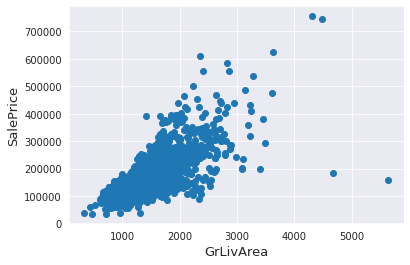

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

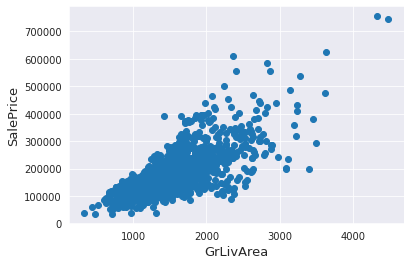

In [ ]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

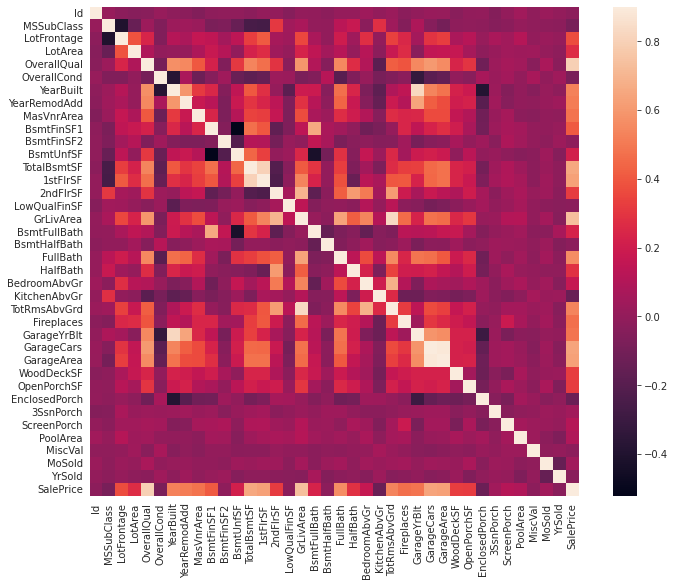

In [ ]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)


 mu = 180932.92 and sigma = 79467.79



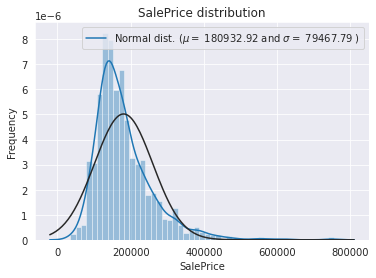

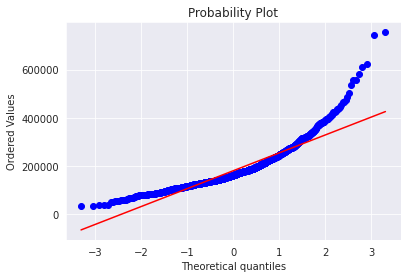

In [ ]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



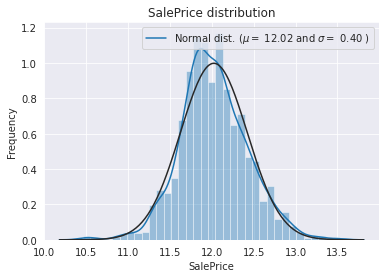

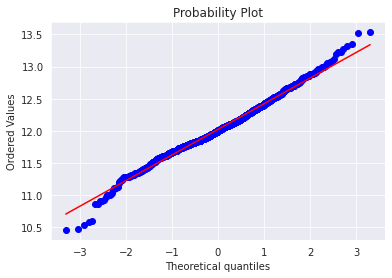

In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [ ]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 80)


In [ ]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageFinish,5.451
GarageYrBlt,5.451
GarageQual,5.451
GarageCond,5.451


Text(0.5, 1.0, 'Percent missing data by feature')

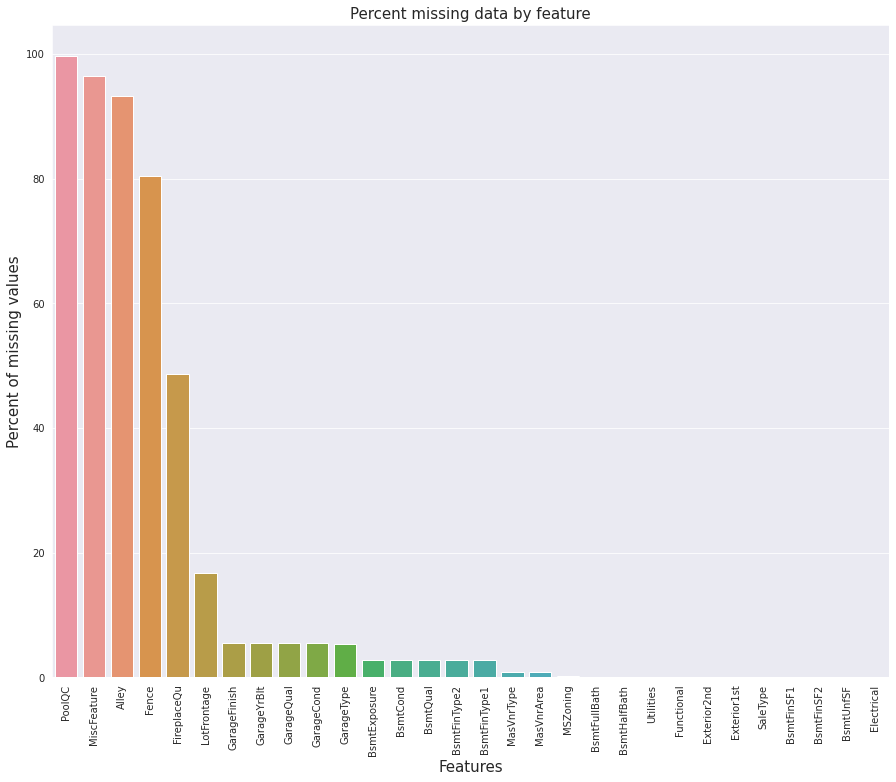

In [ ]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

* Concat & target

In [ ]:
fe_name = list(test)
df_train = train[fe_name]
df = pd.concat((df_train,test))

target = train['SalePrice']

train.shape, test.shape, df.shape

((1458, 81), (1459, 80), (2917, 80))

* PoolQC : 데이터의 NA는 풀이 없음을 의미. 결측값의 비율이 99%로 매우 높고 대부분 주택에는 수영장이 없음을 감안할 때 의미있는 변수

In [ ]:
df['PoolQC'] = df['PoolQC'].fillna('None')

* MiscFeature : data description에 의하면 NA는 "no misc feature"로 기타기능 없음 의미

In [ ]:
df['MiscFeature'] = df['MiscFeature'].fillna('None')

* Alley : data description에 의하면 NA는 'no alley access'로 골목 접근 금지를 의미.

In [ ]:
df['Alley'] = df['Alley'].fillna('None')

* Fence : data description에 의하면 NA는 'no fence'로 울타리가 없다는 의미

In [ ]:
df['Fence'] = df['Fence'].fillna('None')

* FireplaceQu : data description에 의하면 NA는 'no fireplace'로 난로가 없다는 의미

In [ ]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

* LotFrontage : 주택건물에 연결된 각 거리의 면적이 주변의 다른 주택과 비슷한 지역일 가능성이 높기 때문에 이웃의 LotFrontage의 중앙값으로 결측치 대체

In [ ]:
df['LotFrontage'] = df.groupby("Neighborhood")['LotFrontage'].transform(lambda x:x.fillna(x.median()))

* Garage Type, Garage Finish, GarageQual and GarageCond : 누락된 데이터를 None 값으로 대체

In [ ]:
for col in ('GarageType','GarageFinish','GarageQual','GarageCond'):
    df[col] =  df[col].fillna('None')

* GarageYrBlt, GarageArea and GarageCars : 결측치를 0으로 대체합니다.(차고가 없는 것은 차고에 차가 없다는 의미)

In [ ]:
for col in ('GarageYrBlt','GarageArea','GarageCars'):
    df[col] = df[col].fillna(0)

* BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : 지하실이 없으면 결측값이 0일 가능성이 높기 때문에 결측치를 0으로 대체

In [ ]:
for col in ('BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'):
    df[col] = df[col].fillna(0)

* BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : 이러한 모든 범주형 지하실 관련 기능에 대해 Nan은 지하실이 없음을 의미

In [ ]:
for col in ('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    df[col] = df[col].fillna('None')

* MasVnrArea and MasVnrType : NA는 아마도 이 집들에 대한 고정 베니어가 없다는 것을 의미. Area는 0을, Type은 없음을 채울 수 있다.

In [ ]:
df['MasVnrType'] = df['MasVnrType'].fillna("None")
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

* MSZoning(The general zoning classification) : "RL"이 가장 일반적인 값(최빈값)이다. 따라서 "RL"로 결측값을 대체

In [ ]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

* Utilities : 이 범주 기능의 경우 하나의 "NoSeWa"및 2NA를 제외한 모든 데이터는 "ALLPub"입니다. "NoSewa"가 있는 집이 훈련 세트에 있으므로 이 기능은 예측 모델링에 도움이 되지 않는다. 따라서 변수를 제거

In [ ]:
df = df.drop(['Utilities'],axis=1)

* Functional : data description에 의하면 NA는 typical를 의미

In [ ]:
df['Functional'] = df['Functional'].fillna("Typ")

* Electirical : 하나의 NA값이 있다. 이 기능은 대부분 "SBrkr"을 가지므로 결측값으로 설정할 수 있다.

In [ ]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

* KitchenQual : 하나의 NA값이 있다. KitchenQual의 결측값에 TA(최빈값)으로 대체

In [ ]:
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

* Exterior1st and Exterior2nd : 두 변수 모두 Exterior 1 & 2 하나의 결측값만 가진다. 따라서 가장 일반적인 문자로 대체

In [ ]:
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

* SaleType : 가장 빈번한 데이터인 "WD"로 결측치 대체

In [ ]:
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

* MSSubClass : Na는 건물 등급 없음을 의미. 결측값을 None으로 대체 할 수 있다.

In [ ]:
df['MSSubClass'] = df['MSSubClass'].fillna("None")

* 결측값 확인

In [ ]:
null_df = (df.isna().sum() / len(df)) * 100
null_df = null_df.drop(null_df[null_df==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' : null_df})
missing_data.head(20)

,Missing Ratio


* 건물의 클래스인 MSSubClass, 전반적인 조건 등급인 OverallCond, 연 월의 변수인 YrSold와 MoSold 피처에 대해 int가 아닌 범주형으로 astype함수를 이용해 범주화

In [ ]:
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['OverallCond'] = df['OverallCond'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

* 순서형과 명목형 데이터 분리

In [ ]:
df_obj = df.select_dtypes(include='object')
df_obj.head(3)

li_obj = list(df_obj.columns)

df_num = df.select_dtypes(exclude='object')
df_num.head(3)

li_num = list(df_num.columns)

* 결측치 처리

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu','BsmtQual','BsmtCond','GarageQual','GarageCond',
       'ExterQual','ExterCond','HeatingQC','PoolQC','KitchenQual','BsmtFinType1',
       'BsmtFinType2','Functional','Fence','BsmtExposure','GarageFinish','LandSlope',
       'LotShape','PavedDrive','Street','Alley','CentralAir','MSSubClass','OverallCond',
       'YrSold','MoSold')

for c in cols:
    lb = LabelEncoder()
    lb.fit(list(df[c].values))
    df[c] = lb.transform(list(df[c].values))

* 파생변수 생성

In [ ]:
df['TotalSF'] = (df['TotalBsmtSF']+df['1stFlrSF']+df['2ndFlrSF'])
df['YrBItAndRemod'] = df['YearBuilt'] + df['YearRemodAdd']
df['Total_sqr_footage'] = (df['BsmtFinSF1']+df['BsmtFinSF2']+df['1stFlrSF']+df['2ndFlrSF'])
df['Total_Bathrooms'] = (df['FullBath']+(0.5*df['HalfBath'])+df['BsmtFullBath']+(0.5*df['BsmtHalfBath']))
df['Total_porch_sf'] = (df['OpenPorchSF']+df['3SsnPorch']+df['EnclosedPorch']+df['ScreenPorch']+df['WoodDeckSF'])

* hashpool,has2ndfloor,hasgarage,hasbsmt,hasfireplace 피처를 생성하여, 각 피처가 풀장을 가지고 있다 없다를 기준으로 apply 함수 적용시켜 생성하였다.

In [ ]:
df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x>0 else 0)
df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x>0 else 0)
df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x>0 else 0)
df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x>0 else 0)
df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x>0 else 0)

* 수치형 변수 확인

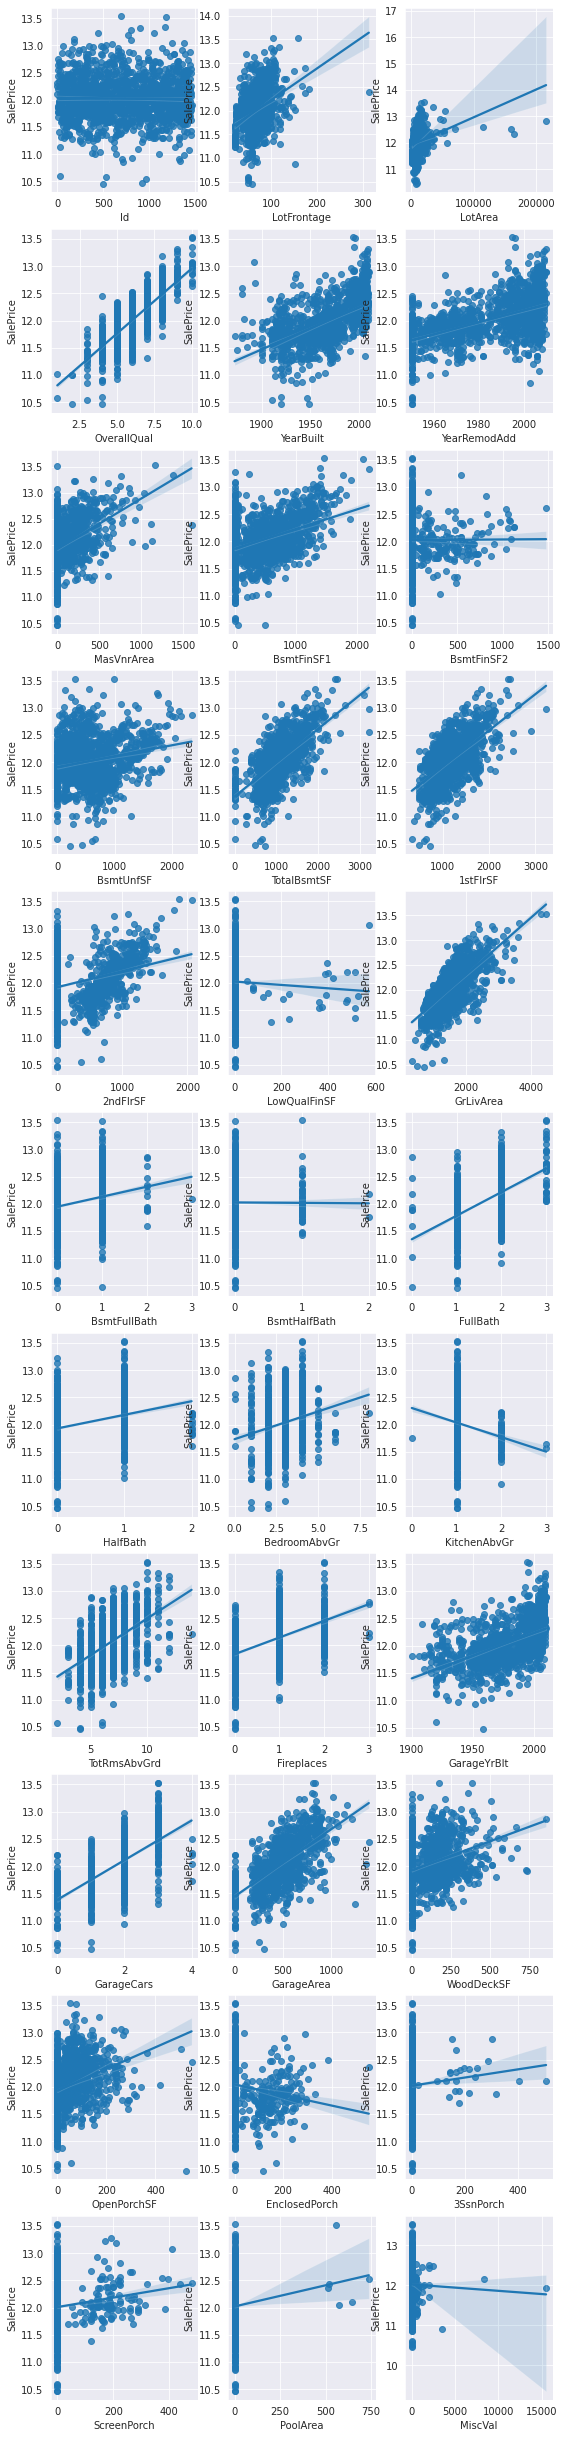

In [ ]:
row = 11
col = 3

fig,axs = plt.subplots(row,col, figsize=(col*3,row*4))


## regplot 그려서 선형선이 강한 변수 따로 구분하였으며, 시각적으로 애매한 부분들은 stats함수의 피어슨상관계수를 보고 상관성 강한 변수 따로 구분
for r in range(0,row):
    for c in range(0,col):
        i = r*col +c
        if i < len(li_num):
            sns.regplot(train[li_num[i]], target, ax=axs[r][c])


In [ ]:
stats.pearsonr(train[li_num[11]],target)            

(0.6205000189170755, 6.572494159280828e-156)

In [ ]:
strong_num = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFIrSF',
             'FullBath','TotRmsAbvGrd','GarageYrBIt','GarageCars','GrLivArea']

* 범주형 변수 확인

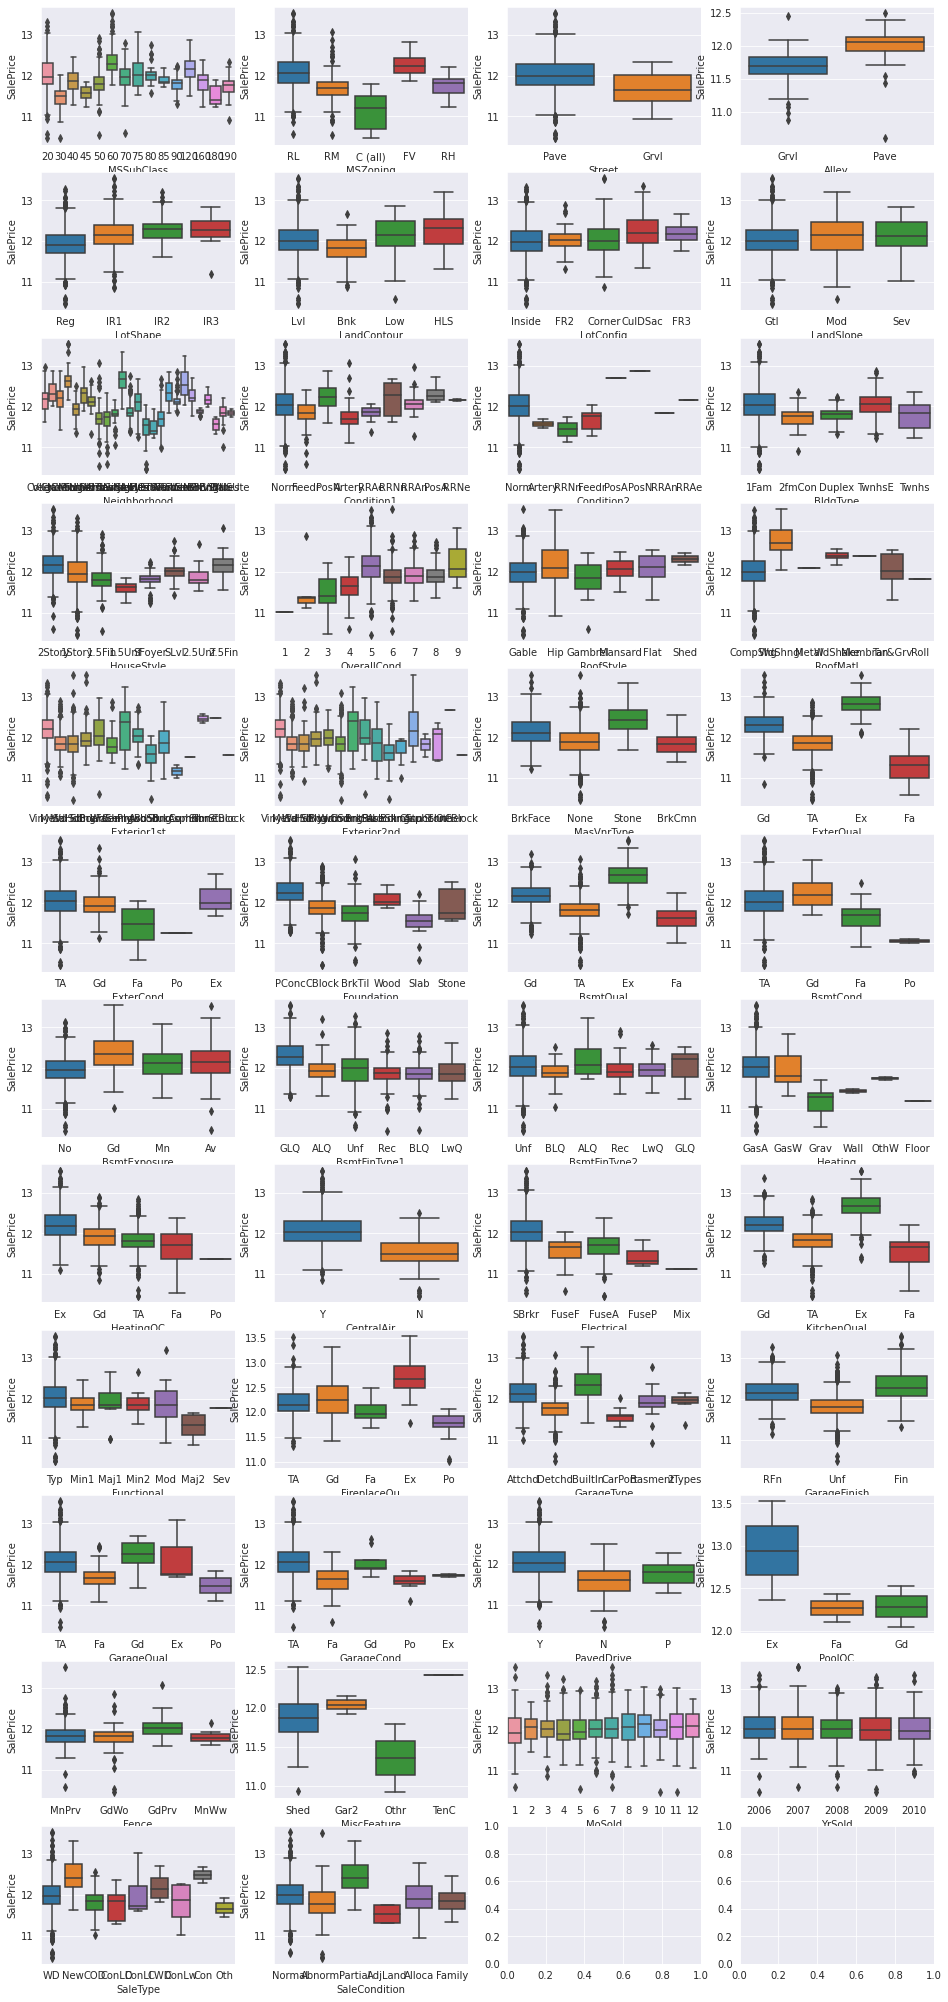

In [ ]:
row = 12
col = 4

fig, axs = plt.subplots(row,col,figsize=(col*4,row*3))

## 범주형 변수들 경우 boxplot을 그려 비교하였으며 타겟변수인 SalesPrice에 영향을 많이 끼치는 변수들과 약한 변수들을 구분하였다.
for r in range(0,row):
    for c in range(0,col):
        i = r*col + c
        if i <len(li_obj):
            sns.boxplot(train[li_obj[i]],target, ax=axs[r][c])



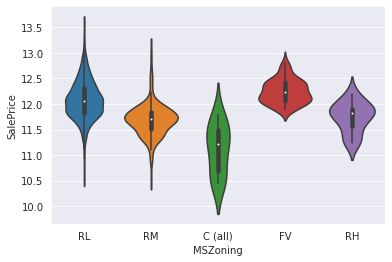

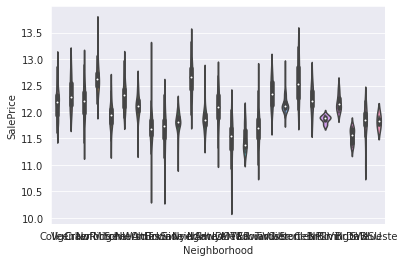

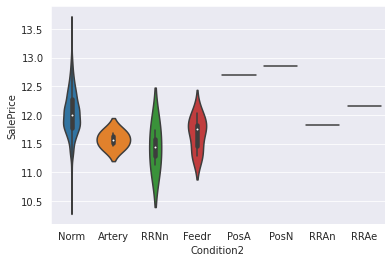

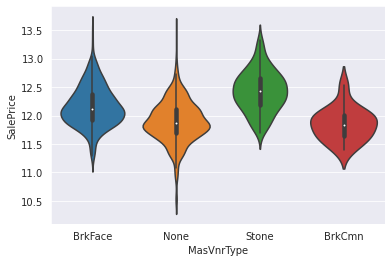

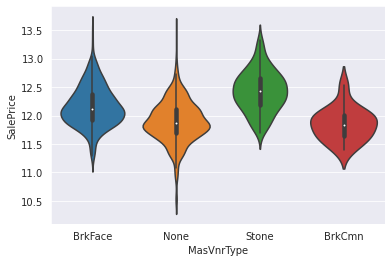

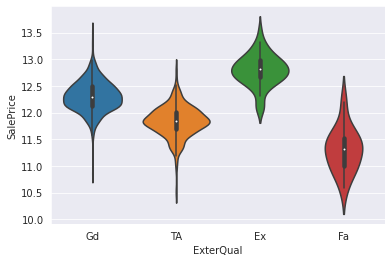

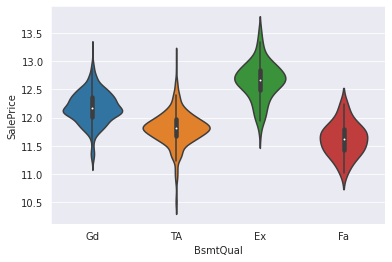

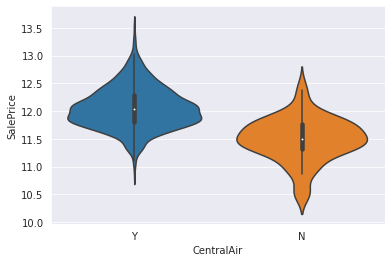

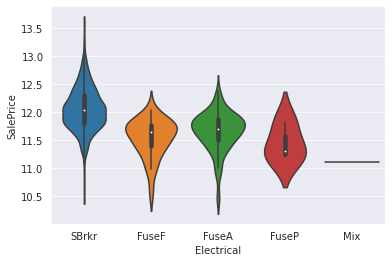

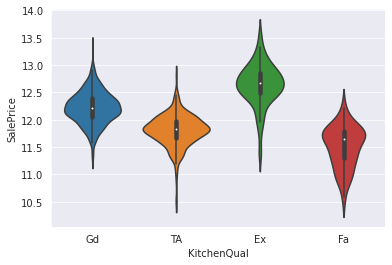

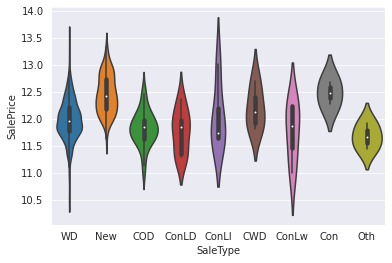

In [ ]:
strong_obj = ['MSZoning','Neighborhood','Condition2','MasVnrType','MasVnrType','ExterQual',
             'BsmtQual','CentralAir','Electrical','KitchenQual','SaleType']          

for li in strong_obj:
    sns.violinplot(x=li, y=target, data=train)
    plt.show()

* box-cox 변환

In [ ]:
numerical_features = df.dtypes[df.dtypes != "object"].index

## 변수들의 왜도 파악 하기 위해 skew 함수 사용. 변수들중 절대값이 0.75 이상인 변수들만 따로 채택하여 로그변환 취하여 준다.
from scipy.stats import skew
skewness = df[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

high_skewness = skewness[abs(skewness) > 0.75]
skew_feat = high_skewness.index

print(high_skewness)
print(skew_feat)

# 변환 전
df[['MiscVal','PoolArea','haspool','LotArea','LowQualFinSF',
   '3SsnPorch','LandSlope','KitchenAbvGr','BsmtFinSF2','EnclosedPorch',
   'ScreenPorch','BsmtHalfBath','MasVnrArea','OpenPorchSF',
   'WoodDeckSF','Total_porch_sf','1stFlrSF','Total_sqr_footage',
   'LotFrontage','GrLivArea','TotalSF','BsmtFinSF1','BsmtUnfSF',
   '2ndFlrSF','BsmtExposure','KitchenQual','ExterQual','Fence',
   'ExterCond','BsmtCond','PavedDrive','BsmtFinType2','GarageQual',
   'CentralAir','GarageCond','GarageYrBlt','hasgarage','Functional',
   'hasbsmt','Street','PoolQC']].head(3)

MiscVal              21.940
PoolArea             17.689
haspool              15.495
LotArea              13.109
LowQualFinSF         12.085
3SsnPorch            11.372
LandSlope             4.973
KitchenAbvGr          4.301
BsmtFinSF2            4.145
EnclosedPorch         4.002
ScreenPorch           3.945
BsmtHalfBath          3.930
MasVnrArea            2.622
OpenPorchSF           2.529
WoodDeckSF            1.845
Total_porch_sf        1.380
1stFlrSF              1.257
Total_sqr_footage     1.254
LotFrontage           1.103
GrLivArea             1.069
TotalSF               1.009
BsmtFinSF1            0.981
BsmtUnfSF             0.920
2ndFlrSF              0.862
BsmtExposure         -1.117
KitchenQual          -1.450
ExterQual            -1.800
Fence                -1.993
ExterCond            -2.496
BsmtCond             -2.861
PavedDrive           -2.978
BsmtFinType2         -3.043
GarageQual           -3.073
CentralAir           -3.458
GarageCond           -3.594
GarageYrBlt         

,MiscVal,PoolArea,haspool,LotArea,LowQualFinSF,3SsnPorch,LandSlope,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,ScreenPorch,BsmtHalfBath,MasVnrArea,OpenPorchSF,WoodDeckSF,Total_porch_sf,1stFlrSF,Total_sqr_footage,LotFrontage,GrLivArea,TotalSF,BsmtFinSF1,BsmtUnfSF,2ndFlrSF,BsmtExposure,KitchenQual,ExterQual,Fence,ExterCond,BsmtCond,PavedDrive,BsmtFinType2,GarageQual,CentralAir,GarageCond,GarageYrBlt,hasgarage,Functional,hasbsmt,Street,PoolQC
0,0,0,0,8450,0,0,0,1,0.000,0,0,0.000,196.000,61,0,61,856,2416.000,65.000,1710,2566.000,706.000,150.000,854,3,2,2,4,4,4,2,6,5,1,5,2003.000,1,6,1,1,3
1,0,0,0,9600,0,0,0,1,0.000,0,0,1.000,0.000,0,298,298,1262,2240.000,80.000,1262,2524.000,978.000,284.000,0,1,3,3,4,4,4,2,6,5,1,5,1976.000,1,6,1,1,3
2,0,0,0,11250,0,0,0,1,0.000,0,0,0.000,162.000,42,0,42,920,2272.000,68.000,1786,2706.000,486.000,434.000,866,2,2,2,4,4,4,2,6,5,1,5,2001.000,1,6,1,1,3


In [ ]:
from scipy.special import boxcox1p
lam=0.15
for feat in skew_feat:
    df[feat] = boxcox1p(df[feat], lam)

# 변환후
df[['MiscVal','PoolArea','haspool','LotArea','LowQualFinSF',
   '3SsnPorch','LandSlope','KitchenAbvGr','BsmtFinSF2','EnclosedPorch',
   'ScreenPorch','BsmtHalfBath','MasVnrArea','OpenPorchSF',
   'WoodDeckSF','Total_porch_sf','1stFlrSF','Total_sqr_footage',
   'LotFrontage','GrLivArea','TotalSF','BsmtFinSF1','BsmtUnfSF',
   '2ndFlrSF','BsmtExposure','KitchenQual','ExterQual','Fence',
   'ExterCond','BsmtCond','PavedDrive','BsmtFinType2','GarageQual',
   'CentralAir','GarageCond','GarageYrBlt','hasgarage','Functional',
   'hasbsmt','Street','PoolQC']].head(3)

,MiscVal,PoolArea,haspool,LotArea,LowQualFinSF,3SsnPorch,LandSlope,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,ScreenPorch,BsmtHalfBath,MasVnrArea,OpenPorchSF,WoodDeckSF,Total_porch_sf,1stFlrSF,Total_sqr_footage,LotFrontage,GrLivArea,TotalSF,BsmtFinSF1,BsmtUnfSF,2ndFlrSF,BsmtExposure,KitchenQual,ExterQual,Fence,ExterCond,BsmtCond,PavedDrive,BsmtFinType2,GarageQual,CentralAir,GarageCond,GarageYrBlt,hasgarage,Functional,hasbsmt,Street,PoolQC
0,0.000,0.000,0.000,19.212,0.000,0.000,0.000,0.730,0.000,0.000,0.000,0.000,8.059,5.715,0.000,5.715,11.693,14.782,5.831,13.699,14.977,11.170,7.483,11.686,1.541,1.194,1.194,1.820,1.820,1.820,1.194,2.260,2.056,0.730,2.056,14.188,0.730,2.260,0.730,0.730,1.541
1,0.000,0.000,0.000,19.712,0.000,0.000,0.000,0.730,0.000,0.000,0.000,0.730,0.000,0.000,9.010,9.010,12.792,14.540,6.221,12.792,14.923,12.063,8.898,0.000,0.730,1.541,1.541,1.820,1.820,1.820,1.194,2.260,2.056,0.730,2.056,14.145,0.730,2.260,0.730,0.730,1.541
2,0.000,0.000,0.000,20.347,0.000,0.000,0.000,0.730,0.000,0.000,0.000,0.000,7.647,5.053,0.000,5.053,11.892,14.585,5.915,13.832,15.150,10.200,9.917,11.725,1.194,1.194,1.194,1.820,1.820,1.820,1.194,2.260,2.056,0.730,2.056,14.184,0.730,2.260,0.730,0.730,1.541


* 라벨 인코딩 안하는변수 모델링 처리 위해 더미변수화

In [ ]:
df = pd.get_dummies(df)
print(df.shape)

(2917, 230)


* 중요 변수 확인

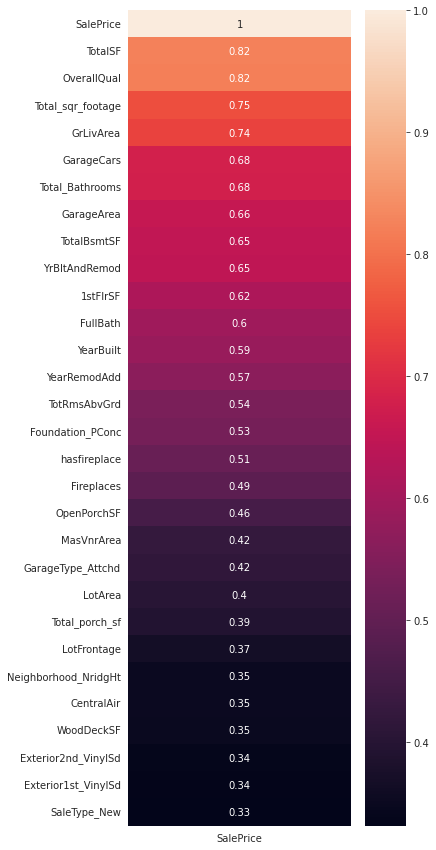

In [ ]:
new_train = df[:train.shape[0]]
new_test = df[train.shape[0]:]

new_train = pd.concat([new_train, target], axis=1, sort=False)

corr_new_train = new_train.corr()
plt.figure(figsize=(5,15))
sns.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30),annot=True)

col_corr_dict = corr_new_train['SalePrice'].sort_values(ascending=False).to_dict()

* 상관성이 큰 변수 38개 확인

In [ ]:
best_columns = []
for key,value in col_corr_dict.items():
    if ((value>=0.33) & (value<0.9)) | (value<=-0.325):
        best_columns.append(key)
print(len(best_columns))

38


* 모델링 과정에서 필요없는 변수 id와 타겟변수 drop

In [ ]:
new_train = new_train.drop(['SalePrice'],axis=1)
new_train = new_train.drop(['Id'],axis=1)
new_test = new_test.drop(['Id'],axis=1)

final_train = new_train[best_columns]
final_test = new_test[best_columns]
final_num = list(final_train.columns)

* 상관성이 큰 변수들 확인하여 regplot을 확인한뒤에 이상치 데이터를 처리하면 모델링 성능을 더 높일 수 있을 것으로 보인다.

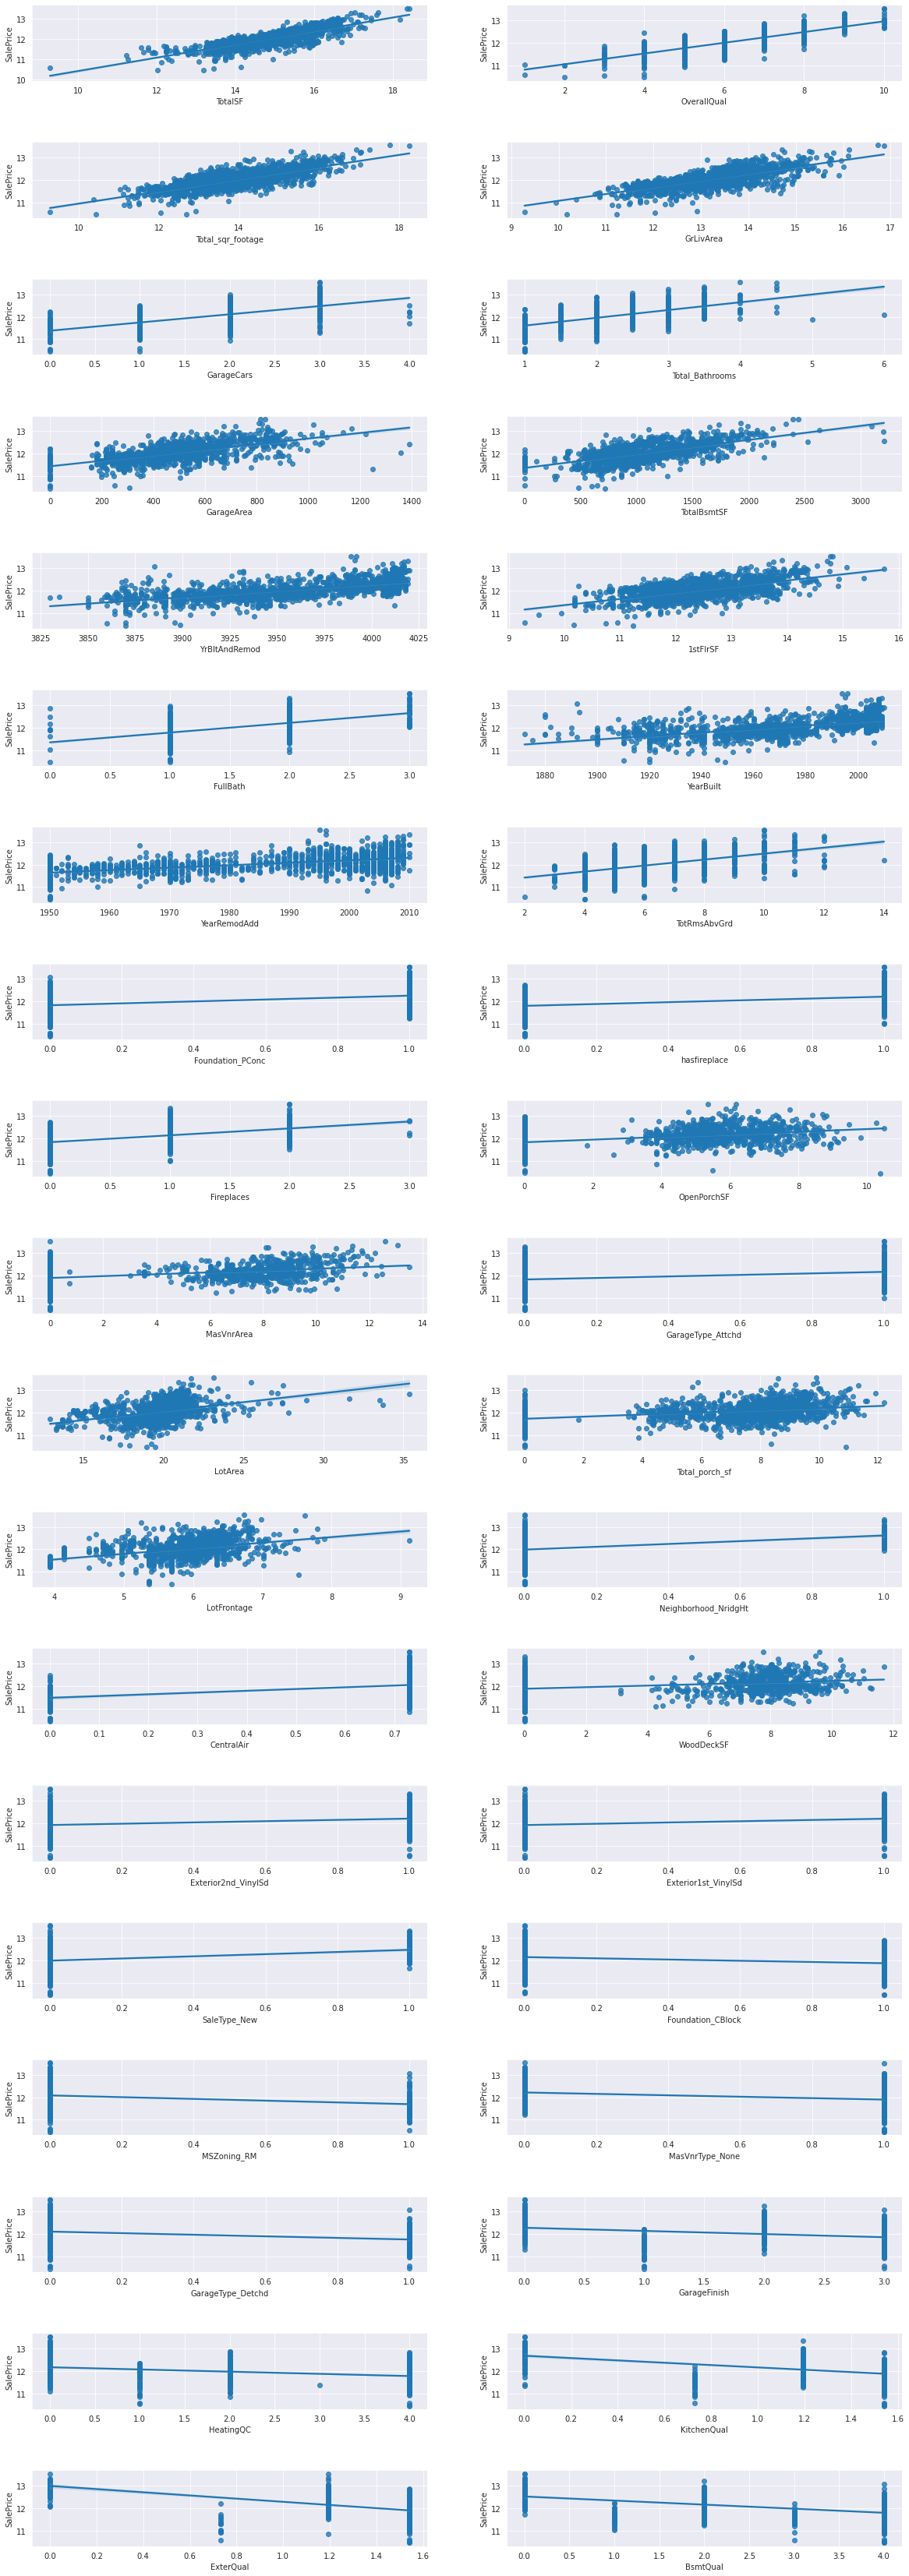

In [ ]:
row=19
col=2

fig,axs = plt.subplots(row,col,figsize=(20,60))
fig.subplots_adjust(hspace=0.8)


for r in range(0,row):
    for c in range(0,col):
        i = r*col +c
        if i < len(best_columns):
            sns.regplot(final_train[final_num[i]], target, fit_reg=True, marker='o', ax=axs[r][c])

# Modeling

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression

* 단순선형 회귀

In [ ]:
from sklearn.preprocessing import RobustScaler

rbst_scaler = RobustScaler()
X_rbst = rbst_scaler.fit_transform(new_train)
test_rbst = rbst_scaler.transform(new_test)

In [ ]:
import statsmodels.api as sm

model = sm.OLS(target.values, new_train)
re = model.fit()
re.summary()

# 모델의 설명력이 1에 가까움으로 높은 수치이지만, 변수들중 P-value가 높은 값들이 존재하여 다중공선성의 문제가 있을수도 있다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     106.1
Date:                Mon, 18 Oct 2021   Prob (F-statistic):               0.00
Time:                        07:52:36   Log-Likelihood:                 1394.4
No. Observations:                1458   AIC:                            -2375.
Df Residuals:                    1251   BIC:                            -1281.
Df Model:                         206                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass               -0.0019      0.003     -0.583      0.560      -0.008       0.005
LotFrontage               0.0085      0.008      1.035      0.301      -0.008       0.025
LotArea                   0.0232      0.003      8.690      0.000       0.018       0.028
Street                    0.1218      0.069      1.764      0.078      -0.014       0.257
Alley                     0.0146      0.013      1.118      0.264      -0.011       0.040
LotShape                  0.0028      0.002      1.209      0.227      -0.002       0.007
LandSlope                 0.0190      0.021      0.892      0.372      -0.023       0.061
OverallQual               0.0421      0.004      9.703      0.000       0.034       0.051
OverallCond               0.0404      0.004     11.266      0.000       0.033       0.047
YearBuilt                 0.0010      0.000      4.097      0.000       0.001       0.001
YearRemodAdd             -0.0002      0.000     -0.784      0.433      -0.001       0.000
MasVnrArea                0.0008      0.003      0.289      0.773      -0.004       0.006
ExterQual                -0.0159      0.014     -1.106      0.269      -0.044       0.012
ExterCond                 0.0181      0.013      1.400      0.162      -0.007       0.043
BsmtQual                 -0.0082      0.004     -2.208      0.027      -0.015      -0.001
BsmtCond                  0.0107      0.008      1.339      0.181      -0.005       0.026
BsmtExposure             -0.0047      0.006     -0.753      0.452      -0.017       0.008
BsmtFinType1             -0.0014      0.002     -0.583      0.560      -0.006       0.003
BsmtFinSF1               -0.0004      0.002     -0.190      0.849      -0.004       0.003
BsmtFinType2             -0.0111      0.013     -0.876      0.381      -0.036       0.014
BsmtFinSF2               -0.0044      0.002     -2.457      0.014      -0.008      -0.001
BsmtUnfSF                -0.0011      0.002     -0.608      0.543      -0.005       0.003
TotalBsmtSF            7.853e-05   3.83e-05      2.050      0.041    3.37e-06       0.000
HeatingQC                -0.0074      0.002     -3.412      0.001      -0.012      -0.003
CentralAir                0.0723      0.023      3.167      0.002       0.028       0.117
1stFlrSF                  0.0251      0.021      1.218      0.223      -0.015       0.066
2ndFlrSF                  0.0331      0.011      3.081      0.002       0.012       0.054
LowQualFinSF              0.0020      0.004      0.509      0.611      -0.006       0.010
GrLivArea                 0.0222      0.030      0.749      0.454      -0.036       0.080
BsmtFullBath              0.5567      0.484      1.150      0.250      -0.393       1.507
BsmtHalfBath              0.3765      0.336      1.121      0.263      -0.283       1.036
FullBath               

In [ ]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =pd.DataFrame()
vif['Features'] = new_train.columns
vif['vif'] = [variance_inflation_factor(new_train.values, i) for i in range(new_train.shape[1])]

# vif가 10 이상이면 다중공선성이 존재한다고 한다.
# 다중공선성 해결방안은 다음과 같다.
# 1. 다중공선성에 robust한 트리모델 사용하는 방법
# 2. 변수제거 및 FE, 변환등을 통한 대체
# 3. 관측값을 늘려 표본의 크기를 증가

# 주어진 데이터로 인하여 표본의 크기를 증가할 수 없기 때문에 robust한 트리모델을 사용하는 방법을 택함.
# robust : 중앙값(median)과 IQR(interquartile range)사용. 아웃라이어 영향을 최소화

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


* RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
rbst_scaler = RobustScaler()
X_rbst = rbst_scaler.fit_transform(new_train)
test_rbst = rbst_scaler.transform(new_test)

* KFold

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

kfold = KFold(n_splits = 4)

random_state = 1
reg = []

reg.append(Lasso(random_state = random_state))
reg.append(ElasticNet(random_state = random_state))
reg.append(RandomForestRegressor(random_state = random_state))
reg.append(GradientBoostingRegressor(random_state = random_state))
reg.append(XGBRegressor(silent=True, random_state=random_state))
reg.append(LGBMRegressor(verbose_eval=False, random_state = random_state))

In [ ]:
# neg_mean_squared_erorr라 cross_val_score에 -를 붙여준 것 같음.

reg_results = []

for regre in reg:
    reg_results.append(np.mean(np.sqrt(-cross_val_score(regre, X_rbst, y=target, scoring='neg_mean_squared_error',
                                                       cv = kfold, n_jobs=-4))))

In [ ]:
reg_means = []
reg_std = []
for reg_result in reg_results:
    reg_means.append(reg_result.mean())
    reg_std.append(reg_result.std())

In [ ]:
reg_re = pd.DataFrame({"CrossvalMeans" : reg_means, "CrossValerros" : reg_std})
reg_re

# CrossValMeans 확인 결과 Gradient boosting, xgboost, 

,CrossvalMeans,CrossValerros
0,0.379,0.000
1,0.378,0.000
2,0.137,0.000
3,0.122,0.000
4,0.124,0.000
5,0.128,0.000


* 파라미터 튜닝 & GridSearchCV

In [ ]:
# Gradient Boosting 파라미터 튜닝
GBC = GradientBoostingRegressor()
gb_param_grid = {'n_estimators' : [100,200,300],
                'learning_rate' : [0.1,0.05,0.01],
                'max_depth' : [4,8],
                'min_samples_leaf' : [100,150],
                'max_features' : [0.3,0.1]}

gsGBC = GridSearchCV(GBC, param_grid = gb_param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=4, verbose=1)
gsGBC.fit(X_rbst, target)
GBC_best = gsGBC.best_estimator_

# 최고 점수
gsGBC.best_score_

Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   22.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 288 out of 288 | elapsed:  2.1min finished


-0.017551134204568632

In [ ]:
# xgboost 파라미터 튜닝

XGB = XGBRegressor()
xgb_param_grid = {'learning_rate' : [1,0.1,0.01,0.001],
                 'n_estimators' : [50,100,200,500,1000],
                 'max_depth' : [1,3,5,10,50]}
gsXGB = GridSearchCV(XGB, param_grid = xgb_param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=4,verbose=1)
gsXGB.fit(X_rbst, target)
XGB_best = gsXGB.best_estimator_

# 최고 점수
gsXGB.best_score_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   46.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  5.3min
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed: 13.3min finished


[08:10:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


-0.014016723093284918

In [ ]:
# LGBMClassifier 파라미터 튜닝
LGB = LGBMRegressor()
lgb_param_grid = {
    'num_leaves' : [1,5,10],
    'learning_rate' : [1,0.1,0.01,0.001],
    'n_estimators' : [50,100,200,500,1000,5000],
    'max_depth' : [15,20,25],
    'num_leaves' : [50,100,200],
    'min_split_gain' : [0.3,0.4]
}
gsLGB = GridSearchCV(LGB, param_grid = lgb_param_grid, cv=kfold, scoring = 'neg_mean_squared_error', n_jobs=4, verbose=1)
gsLGB.fit(X_rbst, target)
LGB_best = gsLGB.best_estimator_

# 최고 점수
gsLGB.best_score_

Fitting 4 folds for each of 432 candidates, totalling 1728 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   45.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  7.7min
[Parallel(n_jobs=4)]: Done 1728 out of 1728 | elapsed: 18.3min finished


-0.018533039905470252

* 앙상블 기법
    * Voting(투표) - 투표를 통해 결과 도출
    * Bagging - Bootstrap Aggregating(샘플 다양하게 중복 생성)
    * Boosting - 이전 오차를 보완하며 가중치 부여
    * Stacking - 서로 다른 모델을 조합해 최고의 성능을 내는 모델 생성하는 것이고, 위의 5개 예측값만을 이용하여 타겟변수 예측


* 앙상블

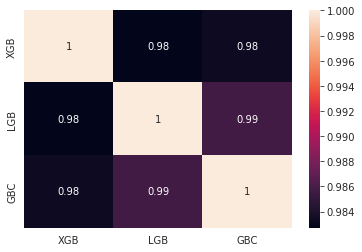

In [ ]:
test_Survived_GBC = pd.Series(GBC_best.predict(test_rbst), name='GBC')
test_Survived_XGB = pd.Series(XGB_best.predict(test_rbst), name='XGB')
test_Survived_LGB = pd.Series(LGB_best.predict(test_rbst), name='LGB')

ensemble_results = pd.concat([test_Survived_XGB, test_Survived_LGB, 
                             test_Survived_GBC], axis=1)
g = sns.heatmap(ensemble_results.corr(), annot=True)

In [ ]:
ensemble = np.expm1(0.1*test_Survived_GBC + 0.8*test_Survived_XGB + 0.1 * test_Survived_LGB)
submission = pd.DataFrame({
    'id' : test['Id'],
    'SalePrice' : ensemble
})
submission.head()

# 3가지 모델을 heatmap을 통해 상관관계 비교해보고 상관성이 높은 
# XGB와 GBC 모델을 이용하여 앙상블 모델 구축

,id,SalePrice
0,1461,124371.583
1,1462,163042.979
2,1463,182060.174
3,1464,198036.823
4,1465,194722.342


* 보팅

In [ ]:
from sklearn.ensemble import VotingRegressor

votingC = VotingRegressor(estimators=[("XGB",XGB_best), ('LGB',LGB_best)], n_jobs=4)
votingC = votingC.fit(X_rbst, target)

test_SalePrice = pd.Series(votingC.predict(test_rbst), name = 'SalePrice')

In [ ]:
submission = pd.DataFrame({
    'id' : test['Id'],
    'SalePrice' : np.expm1(test_SalePrice)
})
submission.head()

# 실제 분류기는 아니지만 각 알고리즘의 다른 특성을 이용하기 위해 병렬로 학습되고 평가되는 다른 세트에 대한 래퍼입니다.
# 투표를 기반으로 구축하고 예측 한 모델의 예측을 결합합니다.

,id,SalePrice
0,1461,125344.695
1,1462,162340.388
2,1463,178507.353
3,1464,193538.465
4,1465,193088.195


* 스태킹

In [ ]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.utils.testing import ignore_warnings

params = {'meta_regressor__C' : [0.1,1.0,10.0,100.0],
         'use_features_in_secondary' : [True, False]}


In [ ]:
clf1 = XGB_best
clf2 = LGB_best
clf3 = GBC_best

lr = LogisticRegression()
st_re = StackingRegressor(regressors = [clf1,clf2,clf3], meta_regressor=RandomForestRegressor())
st_mod = st_re.fit(X_rbst, target)
st_pred = st_mod.predict(test_rbst)

[08:31:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
submission = pd.DataFrame({
    'id' : test['Id'],
    'SalePrice' : np.expm1(st_pred)
})
submission.head()

# Boosting, Stacking 및 Voting과 같은 regressor 앙상블 모델을 적용하여 보스턴 집값 에측

,id,SalePrice
0,1461,126213.573
1,1462,158685.295
2,1463,174381.599
3,1464,194382.385
4,1465,185979.408


* Blending

In [ ]:
kfolds = KFold(n_splits = 10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=new_train):
    rmse = np.sqrt(-cross_val_score(model, X_rbst, target,
                                   scoring = 'neg_mean_squared_error',
                                   cv=kfolds))
    return (rmse)

In [ ]:
alphas_ridge = [14.5,14.6,14.7,14.8,14.9,15,15.1,15.2,15.3,15.4,15.5]
alphas_lasso = [5e-05,0.00001,0.00002,0.00003,0.00004,0.00005,0.00006,0.00007,0.00008]
alphas_enect = [0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007]
enect_l1ratio = [0.8,0.85,0.9,0.95,0.99,1]

In [ ]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor

In [ ]:
ridge = make_pipeline(RobustScaler(),
                     RidgeCV(alphas=alphas_ridge, cv=kfolds))

lasso = make_pipeline(RobustScaler(),
                     LassoCV(max_iter=1e7, alphas=alphas_lasso,
                            random_state=2, cv=kfolds))

enet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=alphas_enect,
                                                 cv=kfolds, l1_ratio=enect_l1ratio))

svr = make_pipeline(RobustScaler(), SVR(C=20, epsilon=0.008, gamma=0.0003))

stack_gen = StackingCVRegressor(regressors=(ridge, lasso, enet, GBC_best, XGB_best, LGB_best),
                               meta_regressor=XGB_best, use_features_in_secondary=True)

In [ ]:
score = cv_rmse(ridge)
print('Kernel Ridge score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))

score = cv_rmse(lasso)
print('Lasso score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))

score = cv_rmse(enet)
print('ElasticNet score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))

score = cv_rmse(svr)
print('SVR score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))

score = cv_rmse(GBC_best)
print('GradientBoosting score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))

score = cv_rmse(XGB_best)
print('Xgboost score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))

score = cv_rmse(LGB_best)
print('Lightgbm score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))

Kernel Ridge score: 0.1096 (0.0162)

Lasso score: 0.1138 (0.0161)

ElasticNet score: 0.1088 (0.0158)

SVR score: 0.1095 (0.0179)

GradientBoosting score: 0.1267 (0.0125)

[08:35:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:35:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:36:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:36:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:36:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:36:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:36:15] WARNING: /workspace/src/objective/regression_obj.cu:152:

In [ ]:
stack_gen_model = stack_gen.fit(np.array(X_rbst), np.array(target))
elastic_model_full_data = enet.fit(X_rbst, target)
lasso_model_full_data = lasso.fit(X_rbst, target)
ridge_model_full_data = ridge.fit(X_rbst, target)
svr_model_full_data = svr.fit(X_rbst, target)
gbr_model_full_data = GBC_best.fit(X_rbst, target)
xgb_model_full_data = XGB_best.fit(X_rbst, target)
lgb_model_full_data = LGB_best.fit(X_rbst, target)

[08:38:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:38:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:38:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:39:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:39:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:39:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:39:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:40:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.1 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.25 * stack_gen_model.predict(np.array(X))))

In [ ]:
pred = np.floor(np.expm1(blend_models_predict(test_rbst)))
submission = pd.DataFrame({
    'id' : test['Id'],
    'SalePrice' : pred
})
submission.head()

# Blending은 다른 앙상블 기술인 스태킹과 비교된다. 
# 다른 예측 모형들의 결과값들을 통해 새로운 모델의 방법을 만드는 앙상블 방법

# 스태킹은 train 데이터 셋의 예측값을 train 데이터로 하여 
# meta regression 학습을 하고 이 meta regression을 통해 test 셋을 예측한다.

# Blending과 Stacking의 차이
# 1) Blending은 검증 데이터 셋에 대한 예측값을 train 데이터에 이용하지만 Stacking은 train 데이터 셋에 대한 예측값을 활용한다.
# 2) Blending은 예측값 뿐 아니라 원래 피처도 활용하는 반면 Stacking은 예측값만 활용한다.

,id,SalePrice
0,1461,121439.000
1,1462,159036.000
2,1463,183495.000
3,1464,195616.000
4,1465,193948.000
